In [108]:
%pylab inline
import rlcompleter, readline
readline.parse_and_bind('tab: complete')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [109]:
train_vectors = np.genfromtxt('train_feature_vectors.txt')
test_vectors = np.genfromtxt('test_feature_vectors.txt')
train_label = [1]*1200 + [0]*1200
test_label = [1]*300 + [0]*300

In [119]:
#clean test data
index = [i for i in range(test_vectors.shape[0]) if np.sum(test_vectors[i]) == 0]
clean_test_vectors = np.delete(test_vectors,index,axis=0)
clean_test_label = np.delete(test_label,index,axis=0)

#PCA

In [161]:
def rank_q(val,vec,q):
    pca_index = []
    pairs = [(np.abs(val[i]),vec[:,i]) for i in range(len(val))]
    sorts = sorted(pairs)#,key = lambda x:x[0],reverse=True)
    for each in sorts[:q:-1]:
        pca_index.append(pairs.index(each))
    return sorts[:q],pca_label
def PCA(train,q):
    cov = np.cov(train.T)
    eigVal,eigVec = np.linalg.eig(cov)
    top_q,index_100 = rank_q(eigVal,eigVec,q)
    W = np.asarray([x[1] for x in top_q]).T
    transformed = train.dot(W)
    return transformed,index_100


In [162]:
#transformed_10,index_10 = PCA(train_vectors,10)
#transformed_50,index_50 = PCA(train_vectors,50)
transformed_100,index_100 = PCA(train_vectors,100)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [95]:
#test custom PCA with existing one
from sklearn.decomposition import PCA
def compare(custom,q):
    pca = PCA(q)
    pca.fit(train_vectors)
    t = pca.transform(train_vectors)
    cp = np.in1d(custom,t)
    ratio = len([i for i in cp if i == True])/len(custom)
    return ratio

In [113]:
test_10 = PCA(clean_test_vectors,10)
test_50 = PCA(clean_test_vectors,50)
test_100 = PCA(clean_test_vectors,100)

In [114]:
transformed_10[3]

array([ 0.00409673+0.j,  0.00773421+0.j,  0.00531587+0.j, -0.00882369+0.j,
       -0.00075328+0.j,  0.00829155+0.j, -0.01065542+0.j,  0.01335769+0.j,
       -0.00184152+0.j, -0.01476756+0.j])

# Normalization

In [115]:
#normalize the data
def normalization(train):
    train = np.asarray(train)
    s_train = []
    for i in range(train.shape[0]):
        s_train.append(train[i]/np.sqrt(np.sum((train[i])**2)))
    return np.asarray(s_train)

In [116]:
normalize_train_10 = normalization(transformed_10)
normalize_train_50 = normalization(transformed_50)
normalize_train_100 = normalization(transformed_100)

In [117]:
normalize_test_10 = normalization(test_10)
normalize_test_50 = normalization(test_50)
normalize_test_100 = normalization(test_100)

0.510887772194
[[210  87]
 [205  95]]
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fan']
['recommended', 'fa

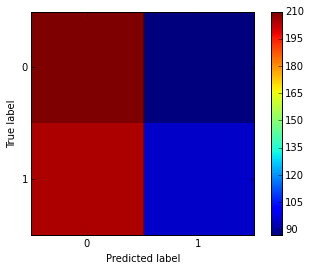

In [158]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(transformed_10,train_label)
#report accuracy of logistic regression
pred = clf.predict(test_10)
accuracy = clf.score(test_10,clean_test_label)
print accuracy
from sklearn.metrics import confusion_matrix
def plot_cm(true,pred):
    cm = confusion_matrix(true,pred)
    print cm
    plt.imshow(cm, interpolation='nearest')
    plt.colorbar()
    tick_marks = np.array([0,1])
    plt.xticks(tick_marks, [0,1])
    plt.yticks(tick_marks, [0,1])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plot_cm(clean_test_label,pred)
maxs = sorted(clf.coef_[0])[len(clf.coef_)-21:]
train_dic = []
import csv
with open('train_dic.txt','r') as f:
    reader = csv.reader(f)
    for line in reader:
        train_dic.append(line)
def buildDic(data,N):
    uniq = []
    ngrams = []
    for line in data:
        ngrams.extend([line[i:i+N] for i in range(len(line)-(N-1))])
    for each in ngrams:
        if each not in uniq:
            uniq.append(each)
    return uniq
dic = buildDic(train_dic,2)
#print max_5
key = []
#for each in maxs:
#    index = [i for i in range(clf.coef_.shape[1]) if clf.coef_[0][i] == each]
#    print dic[index_100[index[0]]]
for each in index_100:
    print dic[each]
#print keywords

0.515912897822
[[182 115]
 [174 126]]


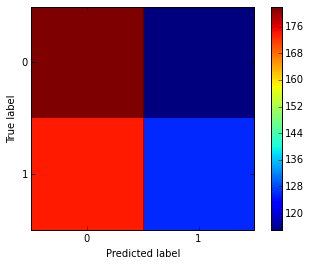

In [128]:
clf = LogisticRegression()
clf.fit(transformed_50,train_label)
#report accuracy of logistic regression
pred = clf.predict(test_50)
accuracy = clf.score(test_50,clean_test_label)
print accuracy
plot_cm(clean_test_label,pred)

0.529313232831
[[174 123]
 [158 142]]


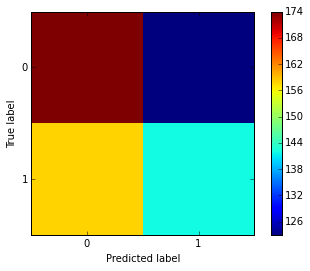

In [129]:
clf = LogisticRegression()
clf.fit(transformed_100,train_label)
#report accuracy of logistic regression
pred = clf.predict(test_100)
accuracy = clf.score(test_100,clean_test_label)
print accuracy
plot_cm(clean_test_label,pred)

In [130]:
# k-means implementation
from scipy.spatial import distance
def k_means(train,threshold):
    #initial centroid
    new_m1 = train[np.random.randint(len(train))]
    new_m2 = train[np.random.randint(len(train))]
    diff = 1000
#keep interation until the different between new centroid and old centriod go under the treshold
    while(diff > threshold):
        c1, c2= [],[]
        c1_label,c2_label = [],[]
        m1,m2 = new_m1,new_m2
        print np.sum(m1),np.sum(m2)
        for i,line in enumerate(train):
#            print np.sum(line)
            dis1 = np.sqrt(sum((line - m1) ** 2))
            dis2 = np.sqrt(sum((line - m2) ** 2))
#            print "dis:",dis1,dis2
            #assign each sample to nearest centroid
            if(dis1 > dis2):
                c2.append(line)
                c2_label.append(train_label[i]);
            if(dis1 < dis2):
                c1.append(line)
                c1_label.append(train_label[i]);
            if(dis1 == dis2):
                x = np.random.randint(2);
                if(x == 0):
                    c1.append(line)
                    c1_label.append(train_label[i]);
                if(x == 1):
                    c2.append(line) 
                    c2_label.append(train_label[i]);
        #adjust centroid
        new_m1 = np.mean(np.asarray(c1),axis = 0)
        new_m2 = np.mean(np.asarray(c2),axis = 0)
        print "new",np.sum(new_m1),np.sum(new_m2)
        #compute the difference between new centroids and old centroids
        diff = (np.sqrt(sum((new_m1 - m1) ** 2)) + np.sqrt(sum((new_m2 - m2) ** 2)))/2
        print "diff",diff
    return new_m1,new_m2,c1,c2,c1_label,c2_label  

In [136]:
m1,m2,c1,c2,c1_label,c2_label = k_means(normalize_train_100,0.5)

(-0.933063606445+0j) (0.273365697884+0j)
new (-0.0457251111095+0j) (-0.0264151533167+0j)
diff (0.970721501902+0j)
(-0.0457251111095+0j) (-0.0264151533167+0j)
new (0.00281915364286+0j) (-0.0797574738949+0j)
diff (0.0832293141715+0j)


In [137]:
def vote(c):
    count0 = len([i for i in c if i == 0.0])
    count1 = len([i for i in c if i == 1.0])
#    print count0,count1
    if(count0 > count1):
        return 0.0
    else:
        return 1.0


In [138]:
vote_c1 =vote(c1_label)
vote_c2 = vote(c2_label)

In [139]:
#evaluate performance of k-menas
def evaluation(c1_label,vote_c1,c2_label,vote_c2):
    ratio1 = len([i for i in c1_label if i == vote_c1])/float(len(c1_label))
    ratio2 = len([i for i in c2_label if i == vote_c2])/float(len(c2_label))
    print "cluster 1 score:",ratio1,"cluster2 score:",ratio2
    ratio = (len([i for i in c1_label if i == vote_c1])+len([i for i in c2_label if i == vote_c2]))/float((len(c1_label)+len(c2_label)))
    return ratio

In [140]:
evaluation(c1_label,vote_c1,c2_label,vote_c2)

cluster 1 score: 0.598997493734 cluster2 score: 0.598503740648


0.59875